<a href="https://colab.research.google.com/github/Looma1116/Kaggle-Study_Seungjoon_Lee/blob/main/MultiLogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Softmax classification

In [25]:
import torch
import torch.optim as optim

x_train = [[1,2,1,1],
           [2,1,3,2],
           [3,1,3,4],
           [4,1,5,5],
           [1,7,5,5],
           [1,2,5,6],
           [1,6,6,6],
           [1,7,7,7]]
y_train = [2,2,2,1,1,1,0,0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)


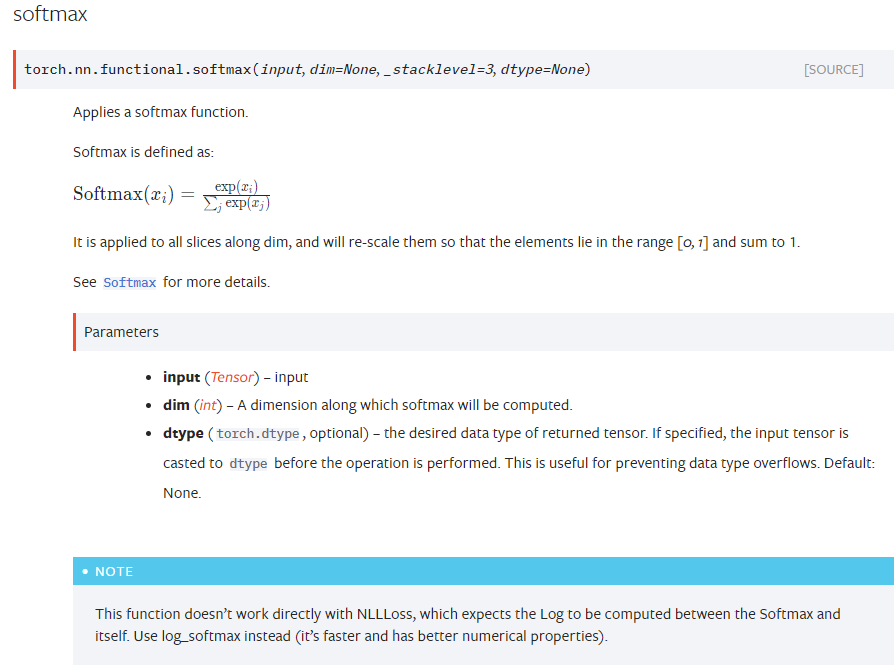

In [36]:
nb_class = 3
nb_data = len(y_train)

y_one_hot = torch.zeros(nb_data,nb_class)
y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)
print(y_one_hot)


tensor([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.]])


In [43]:
import torch.nn.functional as F #for softmax

nb_class = 3
nb_data = len(y_train)


W = torch.zeros((4,3),requires_grad=True) #feature 4개, class 3개
b = torch.zeros((8,3),requires_grad=True)

optimizer = optim.SGD([W,b],lr = 0.01)
nb_epochs = 10001

for epoch in range(nb_epochs):
  hypothesis = F.softmax(x_train@W+b,dim=1) #softmax. 
  #dim의 의미는 softmax 연산을 계산하는 차원.
  #input이 [[a,b,c],[d,e,f]]일 때, dim = 0 이면 [a,b,c]와[d,e,f]를 연산. dim = 1 or -1 이면 a,b,c 와 d,e,f를 연산
  #cost = (y_one_hot*-torch.log(F.softmax(hypothesis,dim=1))).sum(dim=1).mean()
  cost = F.cross_entropy((x_train@W+b),y_train) 

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()
  if epoch % 500 == 0:
    print('Epoch {:4d}/{} Cost:{:.5f}'.format(epoch,nb_epochs,cost.item()))

Epoch    0/10001 Cost:1.09861
Epoch  500/10001 Cost:0.47853
Epoch 1000/10001 Cost:0.31655
Epoch 1500/10001 Cost:0.23224
Epoch 2000/10001 Cost:0.18153
Epoch 2500/10001 Cost:0.14811
Epoch 3000/10001 Cost:0.12463
Epoch 3500/10001 Cost:0.10731
Epoch 4000/10001 Cost:0.09407
Epoch 4500/10001 Cost:0.08364
Epoch 5000/10001 Cost:0.07523
Epoch 5500/10001 Cost:0.06831
Epoch 6000/10001 Cost:0.06253
Epoch 6500/10001 Cost:0.05763
Epoch 7000/10001 Cost:0.05342
Epoch 7500/10001 Cost:0.04978
Epoch 8000/10001 Cost:0.04659
Epoch 8500/10001 Cost:0.04377
Epoch 9000/10001 Cost:0.04128
Epoch 9500/10001 Cost:0.03904
Epoch 10000/10001 Cost:0.03704


In [53]:
print(F.softmax(hypothesis,dim=1))
predict = torch.argmax(hypothesis,dim=-1)
print('Prediction: ',predict)
print('Label: ',y_train)

correct_prediction = predict.float() == y_train
print(correct_prediction)

accuracy = correct_prediction.sum().item() / len(correct_prediction)
print('Accuracy: {:2.2f}% for the training set.'.format(accuracy*100))

tensor([[0.2158, 0.2176, 0.5666],
        [0.2159, 0.2212, 0.5629],
        [0.2149, 0.2232, 0.5619],
        [0.2151, 0.5607, 0.2242],
        [0.2272, 0.5544, 0.2184],
        [0.2193, 0.5668, 0.2139],
        [0.5634, 0.2218, 0.2147],
        [0.5651, 0.2207, 0.2142]], grad_fn=<SoftmaxBackward>)
Prediction:  tensor([2, 2, 2, 1, 1, 1, 0, 0])
Label:  tensor([2, 2, 2, 1, 1, 1, 0, 0])
tensor([True, True, True, True, True, True, True, True])
Accuracy: 100.00% for the training set.
